Importing the dependencies

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [162]:
# loading the dats to a pandas dataframe
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [163]:
# last 5 rows of dataset
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [164]:
# data information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [165]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [166]:
# the distribution of legit transaction and fraudulent transaction
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

This data is highly imbalanced

0 ---> Normal Transaction

1 ---> Fraudulent Transaction

In [167]:
# separating data for analysis
legit = credit_card_data[credit_card_data['Class']==0]
fraud = credit_card_data[credit_card_data['Class']==1]

In [168]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [169]:
# statistical measures of the data
legit['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [170]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [171]:
# compare the mean values for both transaction
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [174]:
credit_card_data_sorted = credit_card_data.sort_values(by='Amount', ascending=False)

# Extract the top 30 amounts for both fraud and non-fraud transactions
top_30_fraud = credit_card_data_sorted[credit_card_data_sorted['Class'] == 1].head(30)
top_30_legit = credit_card_data_sorted[credit_card_data_sorted['Class'] == 0].head(30)

# Print the results
print("Top 30 amounts for fraud transactions:")
print(top_30_fraud[['Amount', 'Class']])

print("\nTop 30 amounts for non-fraud transactions:")
print(top_30_legit[['Amount', 'Class']])

Top 30 amounts for fraud transactions:
         Amount  Class
176049  2125.87      1
6971    1809.68      1
249167  1504.93      1
89190   1402.16      1
81609   1389.56      1
95597   1354.25      1
199896  1335.00      1
10690   1218.89      1
249239  1096.99      1
233258   996.27      1
203328   925.31      1
146790   829.41      1
107637   824.83      1
44001    802.52      1
39183    776.83      1
10630    766.36      1
16863    730.86      1
212644   727.91      1
215132   723.21      1
195383   723.21      1
191074   720.80      1
94218    720.38      1
23422    717.15      1
226814   667.55      1
46918    648.00      1
157918   635.10      1
275992   634.30      1
149874   600.73      1
215984   592.90      1
151196   571.48      1

Top 30 amounts for non-fraud transactions:
          Amount  Class
274771  25691.16      0
58465   19656.53      0
151296  18910.00      0
46841   12910.93      0
54018   11898.09      0
169457  11789.84      0
284249  10199.44      0
227921  1000

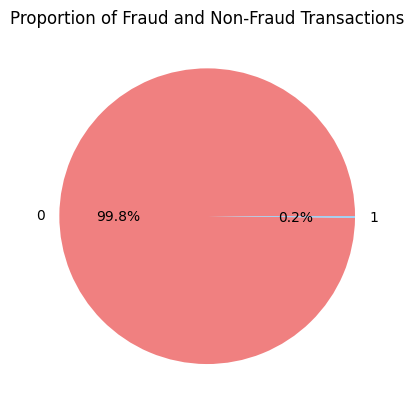

In [180]:
fraud_counts = credit_card_data['Class'].value_counts()
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Proportion of Fraud and Non-Fraud Transactions')
plt.show()

# **Imbalanced data handling**

In [181]:
# normalise the amount column
credit_card_data['normAmount'] = StandardScaler().fit_transform(np.array(credit_card_data['Amount']).reshape(-1, 1))

In [182]:
X = credit_card_data.drop(columns='Class', axis=1)
Y = credit_card_data['Class']

In [183]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

**1. Oversampling using SMOTE**

In [184]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train == 0)))

Before OverSampling, counts of label '1': 394
Before OverSampling, counts of label '0': 227451 



In [185]:
# import SMOTE module from imblearn library
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [186]:
sm = SMOTE(random_state = 2)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_Y: {} \n'.format(Y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_res == 0)))

After OverSampling, the shape of train_X: (454902, 31)
After OverSampling, the shape of train_Y: (454902,) 

After OverSampling, counts of label '1': 227451
After OverSampling, counts of label '0': 227451


In [187]:
lr1 = LogisticRegression()
lr1.fit(X_train_res, Y_train_res.ravel())
predictions = lr1.predict(X_test)

# print classification report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.93      0.14        98

    accuracy                           0.98     56962
   macro avg       0.54      0.95      0.57     56962
weighted avg       1.00      0.98      0.99     56962



**2. Near Miss Algorithm for undersampling**

In [188]:
print("Before Undersampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(Y_train == 0)))

# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()

X_train_miss, Y_train_miss = nr.fit_resample(X_train, Y_train.ravel())

print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_Y: {} \n'.format(Y_train_miss.shape))

print("After Undersampling, counts of label '1': {}".format(sum(Y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(Y_train_miss == 0)))


Before Undersampling, counts of label '1': 394
Before Undersampling, counts of label '0': 227451 

After Undersampling, the shape of train_X: (788, 31)
After Undersampling, the shape of train_Y: (788,) 

After Undersampling, counts of label '1': 394
After Undersampling, counts of label '0': 394


In [189]:
# train the model on train set
lr2 = LogisticRegression()
lr2.fit(X_train_miss, Y_train_miss.ravel())
predictions = lr2.predict(X_test)

# print classification report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92     56864
           1       0.01      0.95      0.02        98

    accuracy                           0.85     56962
   macro avg       0.51      0.90      0.47     56962
weighted avg       1.00      0.85      0.92     56962



**3. Random Under Sampling**

Build a sample dataset containing similar distribution of normal transactions and the fraudulent transactions

Number of fraudulent transactions is 492

In [190]:
legit_sample = legit.sample(n=492)

In [191]:
# concatinating legit_sample and fraud dataframes

new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [192]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
130892,79454.0,-0.825317,0.375634,2.673076,-1.868642,-0.653293,-0.601132,0.350165,0.049979,1.523343,...,-0.012806,0.387424,-0.294128,0.589478,0.367086,-0.785395,0.201045,-0.085333,1.00,0
98025,66486.0,1.195694,0.143676,-0.135817,0.960994,0.630742,0.938891,0.008336,0.167594,-0.001245,...,-0.122940,-0.132005,-0.263183,-1.310778,0.837781,-0.249314,0.037561,-0.004277,19.95,0
40918,40457.0,1.378848,-0.781982,0.513546,-1.004143,-0.890418,0.266044,-1.115198,0.140444,-0.608245,...,0.369672,0.961759,-0.277511,-0.788061,0.552277,0.003232,0.030094,0.007360,29.99,0
73968,55369.0,1.452228,-0.304065,-0.062271,-0.879652,-0.389710,-0.736357,-0.177177,-0.297786,-1.116379,...,-0.319447,-1.059786,0.082011,-0.476967,0.339866,-0.595806,-0.004808,0.015799,25.90,0
9145,13008.0,-0.876811,0.779665,2.812069,0.318359,-0.593689,0.152020,0.035482,0.224338,1.451343,...,0.013664,0.487343,-0.198361,0.394829,0.192420,0.487941,0.275532,0.129740,33.00,0


In [193]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [194]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96054.949187,0.227704,-0.057226,-0.042828,-0.046211,0.012506,0.026861,0.061776,0.056200,-0.066967,...,-0.016626,0.019489,0.051121,-0.001136,0.000636,-0.020570,0.031260,0.019890,-0.008642,87.576118
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting data into features and targets

In [195]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [196]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
130892,79454.0,-0.825317,0.375634,2.673076,-1.868642,-0.653293,-0.601132,0.350165,0.049979,1.523343,...,-0.024405,-0.012806,0.387424,-0.294128,0.589478,0.367086,-0.785395,0.201045,-0.085333,1.00
98025,66486.0,1.195694,0.143676,-0.135817,0.960994,0.630742,0.938891,0.008336,0.167594,-0.001245,...,-0.059460,-0.122940,-0.132005,-0.263183,-1.310778,0.837781,-0.249314,0.037561,-0.004277,19.95
40918,40457.0,1.378848,-0.781982,0.513546,-1.004143,-0.890418,0.266044,-1.115198,0.140444,-0.608245,...,0.187966,0.369672,0.961759,-0.277511,-0.788061,0.552277,0.003232,0.030094,0.007360,29.99
73968,55369.0,1.452228,-0.304065,-0.062271,-0.879652,-0.389710,-0.736357,-0.177177,-0.297786,-1.116379,...,0.191364,-0.319447,-1.059786,0.082011,-0.476967,0.339866,-0.595806,-0.004808,0.015799,25.90
9145,13008.0,-0.876811,0.779665,2.812069,0.318359,-0.593689,0.152020,0.035482,0.224338,1.451343,...,0.111045,0.013664,0.487343,-0.198361,0.394829,0.192420,0.487941,0.275532,0.129740,33.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [197]:
Y

130892    0
98025     0
40918     0
73968     0
9145      0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

Split the data into train and test data

In [198]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [199]:
print(X.shape, X_train.shape, X_test.shape, )

(984, 30) (787, 30) (197, 30)


Model Training

Logistic Regression

In [200]:
model = LogisticRegression()

In [201]:
# training the logistic regression model
model.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation based on accuracy score

In [202]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [203]:
print("Accuracy on training data: ",training_data_accuracy)

Accuracy on training data:  0.9479034307496823


In [204]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [205]:
print("Accuracy on test data: ",test_data_accuracy)

Accuracy on test data:  0.8984771573604061
